In [1]:
import re
import pandas as pd

In [2]:
# Load chat data
with open("WhatsApp Chat with ANNOUNCEMENT SECTION - C.txt", "r", encoding="utf-8") as f:
    data = f.read()

In [3]:
# Pattern that matches WhatsApp date-time with non-breaking space and am/pm
pattern = r'\d{2}/\d{2}/\d{2}, \d{1,2}:\d{2}\u202f[ap]m - '

In [4]:
print(data)


06/12/21, 1:51 pm - Piyush Chauhan created group "ANNOUNCEMENT SECTION - C"
06/12/21, 1:51 pm - You were added
13/10/21, 8:44 pm - This group was added to a community. Tap to view.
13/10/21, 8:44 pm - Anyone in this community can join this group.
30/01/23, 11:36 am - Saad JH: No more class today
30/01/23, 8:40 pm - Saad JH: Theory class is scheduled on tue and wed at 1:30 pm
30/01/23, 8:41 pm - Saad JH: 404 on tym
30/01/23, 8:48 pm - Saad JH: 409 and 402 will also be on time
31/01/23, 11:05 am - Raza Sultan Jh: Class today at 11.30..as per Time table
31/01/23, 11:05 am - Raza Sultan Jh: 402
31/01/23, 11:18 am - Raza Sultan Jh: This message was deleted
31/01/23, 11:33 am - Raza Sultan Jh: 410 me aa jao
31/01/23, 11:33 am - Raza Sultan Jh: Class started
31/01/23, 1:04 pm - Saad JH: 404 on time
31/01/23, 1:41 pm - Saad JH: This message was deleted
31/01/23, 1:54 pm - Saad JH: All come in 405
31/01/23, 1:54 pm - Saad JH: for DAA
31/01/23, 6:31 pm - Saad JH: 402 and 404 will be on time😊
01/

In [5]:
# Split messages and extract dates
messages = re.split(pattern, data)[1:]
dates = re.findall(pattern, data)

In [6]:
# Clean up dates by removing the ' - ' at the end
dates = [d.replace(' - ', '') for d in dates]

In [7]:
# Create DataFrame
df = pd.DataFrame({'user_message': messages, 'message_date': dates})



In [8]:
# Convert to datetime (note: %I is for 12-hour, %p is for am/pm)
df['message_date'] = df['message_date'].str.replace('\u202f', ' ', regex=False)
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %I:%M %p')


# Rename column
df.rename(columns={'message_date': 'date'}, inplace=True)

# Show first few rows
print(df.head())

                                        user_message                date
0  Piyush Chauhan created group "ANNOUNCEMENT SEC... 2021-12-06 13:51:00
1                                   You were added\n 2021-12-06 13:51:00
2  This group was added to a community. Tap to vi... 2021-10-13 20:44:00
3    Anyone in this community can join this group.\n 2021-10-13 20:44:00
4                     Saad JH: No more class today\n 2023-01-30 11:36:00


In [9]:
df.shape

(2379, 2)

In [10]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split(r'([\w\W]+?):\s ', message)
    if entry[1:]:# user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns = ['user_message'], inplace=True)
df.head()

,date,user,message
0,2021-12-06 13:51:00,group_notification,"Piyush Chauhan created group ""ANNOUNCEMENT SEC..."
1,2021-12-06 13:51:00,group_notification,You were added\n
2,2021-10-13 20:44:00,group_notification,This group was added to a community. Tap to vi...
3,2021-10-13 20:44:00,group_notification,Anyone in this community can join this group.\n
4,2023-01-30 11:36:00,group_notification,Saad JH: No more class today\n


In [11]:
df['Year'] = df['date'].dt.year
df['Months'] = df['date'].dt.month_name()
df['Day'] = df['date'].dt.day_name()
df['Hour'] = df['date'].dt.hour
df['Minute'] = df['date'].dt.minute

In [12]:
df.head()

,date,user,message,Year,Months,Day,Hour,Minute
0,2021-12-06 13:51:00,group_notification,"Piyush Chauhan created group ""ANNOUNCEMENT SEC...",2021,December,Monday,13,51
1,2021-12-06 13:51:00,group_notification,You were added\n,2021,December,Monday,13,51
2,2021-10-13 20:44:00,group_notification,This group was added to a community. Tap to vi...,2021,October,Wednesday,20,44
3,2021-10-13 20:44:00,group_notification,Anyone in this community can join this group.\n,2021,October,Wednesday,20,44
4,2023-01-30 11:36:00,group_notification,Saad JH: No more class today\n,2023,January,Monday,11,36


In [13]:
df[df['user'] == 'Saad JH'].shape

(0, 8)

In [14]:
words = []
for message in df['message']:
    words.extend(message.split())

In [15]:
len(words)

27135

In [16]:
from urlextract import URLExtract  

extractor = URLExtract()
urls = extractor.find_urls("Let's www.gmail.com have URL stackoverflow.com as an example google .com , http://facebook.com, ftp://url.in , ")
print(urls) 


['www.gmail.com', 'stackoverflow.com', 'http://facebook.com', 'ftp://url.in']


In [17]:
links = []
for message in df['message']:
    print(message)
    links.extend(extractor.find_urls(message))

Piyush Chauhan created group "ANNOUNCEMENT SECTION - C"

You were added

This group was added to a community. Tap to view.

Anyone in this community can join this group.

Saad JH: No more class today

Saad JH: Theory class is scheduled on tue and wed at 1:30 pm

Saad JH: 404 on tym

Saad JH: 409 and 402 will also be on time

Raza Sultan Jh: Class today at 11.30..as per Time table

Raza Sultan Jh: 402

Raza Sultan Jh: This message was deleted

Raza Sultan Jh: 410 me aa jao

Raza Sultan Jh: Class started

Saad JH: 404 on time

Saad JH: This message was deleted

Saad JH: All come in 405

Saad JH: for DAA

Saad JH: 402 and 404 will be on time😊

Raza Sultan Jh: Class today at 11.30..as per Time table

Raza Sultan Jh: 402 ki class h

Raza Sultan Jh: Room no 404

Piyush Chauhan: Room 420

Piyush Chauhan: 404 in room 214

Saad JH: No labs

Piyush Chauhan: https://classroom.google.com/c/NTg4MTY5MTk2Nzk5?cjc=cgkef5p

Piyush Chauhan: Join for operating system

Saad JH: Tomorrow's maths classs at 

Alam Jh Section C: IMG-20230328-WA0004.jpg (file attached)

Alam Jh Section C: Assignment disaster management

Alam Jh Section C: Last date Friday

Alam Jh Section C: Adobe Scan 28 Mar 2023.pdf (file attached)
Adobe Scan 28 Mar 2023.pdf

Alam Jh Section C: All come in room 403 for class 402

Alam Jh Section C: Class started

Alam Jh Section C: This message was deleted

Alam Jh Section C: All come in LT 15 for class 404

+91 93354 07468: 402 is on time

Alam Jh Section C: Today *OPERATING SYSTEM*(theory) CLASS FROM 11:00am sharp

+91 93354 07468: From 11:30

Piyush Chauhan: IMG-20230329-WA0000.jpg (file attached)

Piyush Chauhan: IMG-20230329-WA0002.jpg (file attached)

Piyush Chauhan: IMG-20230329-WA0001.jpg (file attached)

Alam Jh Section C: IMG-20230329-WA0003.jpg (file attached)

Alam Jh Section C: IMG-20230329-WA0004.jpg (file attached)

Alam Jh Section C: IMG-20230329-WA0005.jpg (file attached)

+91 93354 07468: 402 in room number 409

+91 93354 07468: Come fast

Alam Jh Section 

+91 93354 07468: Come fast in 410

+91 93354 07468: Sir aagye hai

Piyush Chauhan: Roll no 133

Piyush Chauhan: Se 137

Piyush Chauhan: In lab

Piyush Chauhan: Saare yaha lab ke samne aajao

Piyush Chauhan: Yake your responsibility mai yahi batayunga

+91 93354 07468: 139 to 143 come fast

+91 93354 07468: This message was deleted

+91 93354 07468: 139 to 143 come fast

+91 93354 07468: 144 -148

+91 93354 07468: Come fast

+91 93354 07468: 144 to 148 come fast

+91 93354 07468: 159 -163 come fast your turn

+91 93354 07468: 164-168 come fast

+91 93354 07468: COme its your turn

+91 93354 07468: 164 -180 come fast

+91 93354 07468: 171 cone fast

+91 93354 07468: 172-176 come fast

+91 93354 07468: 164  to 168 come fast its urgent

+91 93354 07468: And 177-181 come

+91 93354 07468: Moin Qasim,saad,najaf nehal cone fast

+91 93354 07468: 182-186 come

+91 93354 07468: 187-192

+91 93354 07468: Come fast

+91 93354 07468: 193 - 199 come fast

+91 93354 07468: Practice all questions of 

+91 93354 07468: Topic for coi

+91 93354 07468: Last date is 29

+91 93354 07468: No 507

+91 93354 07468: 502 and DED 13  is on time and yet no information regarding OOPS

+91 93354 07468: OOPS  is also on time

+91 93354 07468: 504 is from 2 pm

+91 93354 07468: All come fast in 203 for 504 class

Mohd Adnan Jh: *213

+91 93354 07468: Come fast in 409 for 502 class

+91 93354 07468: Come fast in LT6 for DED13 class

+91 93354 07468: Tomorrow schedule
No 507 
Ded on time 504 on time 
And 509 is Not confirmed yet

+91 93354 07468: No 509

+91 93354 07468: Came near LT 6 for attendance of DED 13

+91 93354 07468: Tomorrow 501 is on time

+91 93354 07468: Those who are in college meet naved sir for 501 class

+91 93354 07468: Tomorrow 505 and 503 is on time 
And yet no information about 508

+91 93354 07468: No 508 today

+91 93354 07468: No 505 today

+91 93354 07468: 503 from 2:30 pm

+91 93354 07468: Class start in 10 min in LT6

Alam Jh Section C: Class started inLT 6 come fast

Ala

+91 93354 07468: All the students collect their opps lab file on 5th December

Alam Jh Section C: Collect oops lab file from ma'am office 2nd floor infornt of naved sir

+91 93354 07468: 1)24-Aug-2023
2)25-Aug-2023
3)1-sep-2023
4)8-sep-2023
5)21-sep-2023
6)22-sep-2023
7)5-oct-2023
8)6-oct-2023
9)12-oct-2023
10)13-oct-2023
11)26-oct-2023
12)2-Nov-2023
13)3-Nov-2023
14)9-Nov-2023
15)16-Nov-2023

+91 93354 07468: Oops date

+91 93354 07468: This is the date which you have to write in oops lab file above was sent by mistake only

Mohd Adnan Jh: Oops practical from 2 pm sharp <This message was edited>

+91 93354 07468: Everyone come fast for practical  in 4 th floor  dbms lab

Mohd Adnan Jh: 149-153

Mohd Adnan Jh: Come fast near office

Mohd Adnan Jh: 154-158

Mohd Adnan Jh: Come fast

Mohd Adnan Jh: 159-163

Mohd Adnan Jh: Come fast

Mohd Adnan Jh: This message was deleted

Mohd Adnan Jh: Come fast

Mohd Adnan Jh: 164-170

Mohd Adnan Jh: Come fast

Mohd Adnan Jh: 171-175

Mohd Adnan Jh: T

+91 93354 07468: <Media omitted>
B.TechCSE__6th_7th.docx

+91 93354 07468: 603 from 3pm

Mohd Adnan Jh: Class in 409

Mohd Adnan Jh: Class started

+91 93354 07468: https://docs.google.com/forms/d/e/1FAIpQLSd_LSUfIBLGQRA7yepft6A4rPNSy96mKSj-27yb4_-tmZJRjA/viewform?pli=1

+91 93354 07468: For those who want to give sessional. (If any sessional not given by him/her)

Mohd Adnan Jh: Also for those who want to reappear in the sessional is he or she doesn't score good marks in any sessional.

Mohd Usaid
8. 2021-310-161: Mohd Yasir
9. 2021-310-177: Amber Raza
10. 2021-310-178: Rahul rawat
11. 2021-310-179: Rahul Sharma
12. 2021-310-191: Sameer Tyagi
13. 2021-310-194: Sayaan  Alam
14. 2021-310-198: Sayyed Hifza


Note: All students must Meet me only from 9:10-9:30 AM for attendance related issues.

+91 93354 07468: 603

+91 93354 07468: Aamir tum bhi detain ho CN main

+91 93354 07468: This is the  OE11  assigned group bhi check kerlia karo kabhi yrr 
Ma'am se bolne se pahle bas kuch bhi bol 

+91 93354 07468: Students who can come today they can get it checked today

+91 93354 07468: Those who are not coming today they can get it checked tomorrow

+91 93354 07468: For 704 tutorial copy

+91 93354 07468: For Semester- 8

+91 93354 07468: We will have an induction session for MOOCs tomorrow at 11 a.m. MOOCs are online courses that all students are required to choose in Semester 8. The session will provide an introduction to MOOCs and explain the procedure for selecting these courses.

Link - https://meet.google.com/wzt-bnhm-ivi

Mohd Adnan Jh: Tomorrow OE23 sessional from 9:30am

Piyush Chauhan: and yes cr will there be sultana mam’s class or induction meeting tomorrow from 11 am ?

Mohd Adnan Jh: DED51 will be a half an hour class tomorrow.(From 10:30am) <This message was edited>

+91 93354 07468: This message was deleted

+91 93354 07468: No 703 tomorrow

Alam Jh Section C: Please   come in 213 room no <This message was edited>

Alam Jh Section C: Sessional started

Mohd Ad

In [18]:
len(links)

121

In [19]:
x = df['user'].value_counts().head()

In [20]:
import matplotlib.pyplot as plt

In [21]:
name = x.index
count = x.values

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

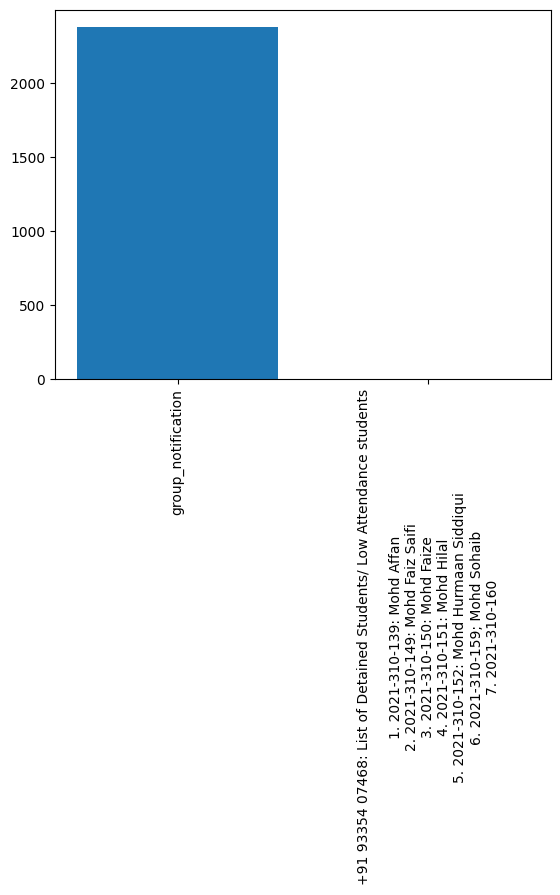

In [22]:
plt.bar(name,count)
plt.xticks(rotation='vertical')

In [23]:
 round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})


,name,percent
0,group_notification,99.96
1,+91 93354 07468: List of Detained Students/ Lo...,0.04


In [24]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']
temp

,date,user,message,Year,Months,Day,Hour,Minute
1810,2024-04-25 16:10:00,+91 93354 07468: List of Detained Students/ Lo...,Mohd Usaid\n8. 2021-310-161: Mohd Yasir\n9. 20...,2024,April,Thursday,16,10


In [25]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [26]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
    
    

In [27]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))


,0,1
0,mohd,2
1,rahul,2
2,usaid,1
3,8.,1
4,2021-310-161:,1
5,yasir,1
6,9.,1
7,2021-310-177:,1
8,amber,1
9,raza,1


In [28]:
!pip install emoji --upgrade

In [29]:
import emoji

In [30]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [31]:
df['month_num'] = df['date'].dt.month

In [32]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,📍,11
1,✨,11
2,📌,9
3,📚,8
4,🥳,6
...,...,...
80,🙌,1
81,☹,1
82,🤝,1
83,👍,1


In [33]:
df['date'] = pd.to_datetime(df['date'])

# Extract datetime components
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()

In [34]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [35]:
time = []  # Initialize empty list with time = []

for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [37]:
timeline['time'] = time

In [38]:
timeline

,year,month_num,month,message,time
0,2021,10,October,2,October-2021
1,2021,12,December,2,December-2021
2,2023,1,January,14,January-2023
3,2023,2,February,237,February-2023
4,2023,3,March,207,March-2023
5,2023,4,April,106,April-2023
6,2023,5,May,86,May-2023
7,2023,6,June,4,June-2023
8,2023,7,July,103,July-2023
9,2023,8,August,182,August-2023


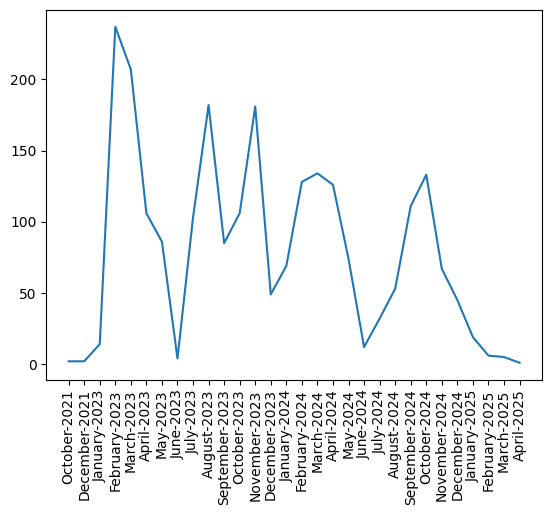

In [41]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation = 'vertical')
plt.show()

In [43]:
df['only_date'] = df['date'].dt.date

In [46]:
daily_timeline  = df.groupby('only_date').count()['message'].reset_index()

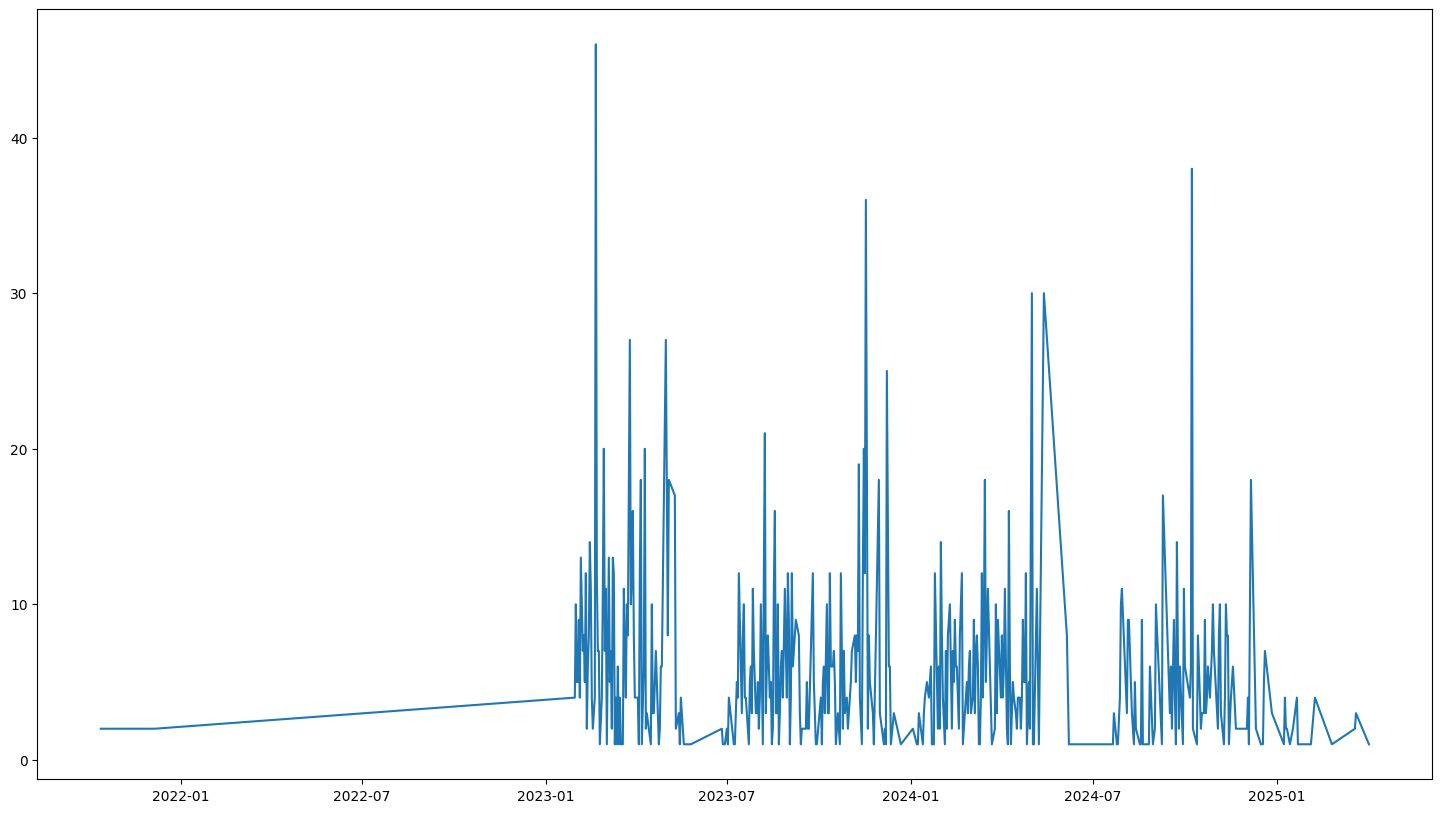

In [47]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [48]:
df['day_name'] = df['date'].dt.day_name()

In [49]:
df['day_name'].value_counts()

Monday       617
Tuesday      428
Thursday     377
Friday       359
Wednesday    344
Sunday       188
Saturday      66
Name: day_name, dtype: int64

In [50]:
df.head()

,date,user,message,Year,Months,Day,Hour,Minute,month_num,year,month,only_date,day_name
0,2021-12-06 13:51:00,group_notification,"Piyush Chauhan created group ""ANNOUNCEMENT SEC...",2021,December,Monday,13,51,12,2021,December,2021-12-06,Monday
1,2021-12-06 13:51:00,group_notification,You were added\n,2021,December,Monday,13,51,12,2021,December,2021-12-06,Monday
2,2021-10-13 20:44:00,group_notification,This group was added to a community. Tap to vi...,2021,October,Wednesday,20,44,10,2021,October,2021-10-13,Wednesday
3,2021-10-13 20:44:00,group_notification,Anyone in this community can join this group.\n,2021,October,Wednesday,20,44,10,2021,October,2021-10-13,Wednesday
4,2023-01-30 11:36:00,group_notification,Saad JH: No more class today\n,2023,January,Monday,11,36,1,2023,January,2023-01-30,Monday


In [55]:
period = []
for Hour in df[['day_name','Hour']]['Hour']:
    if Hour == 23:
        period.append(str(Hour)+"-"+str('00'))
    elif Hour == 0:
        period.append(str('00')+"-"+str(Hour+1))
    else:
        period.append(str(Hour)+"-"+str(Hour+1))

In [56]:
df['period'] = period

In [57]:
df.sample(5)

,date,user,message,Year,Months,Day,Hour,Minute,month_num,year,month,only_date,day_name,period
1473,2024-02-09 08:53:00,group_notification,"+91 93354 07468: OE from 9:10 in LT, so stand ...",2024,February,Friday,8,53,2,2024,February,2024-02-09,Friday,8-9
910,2023-08-28 07:59:00,group_notification,Mohd Adnan Jh: All bring your DED13(Assignment...,2023,August,Monday,7,59,8,2023,August,2023-08-28,Monday,7-8
350,2023-03-20 11:37:00,group_notification,+91 93354 07468: In room number 404\n,2023,March,Monday,11,37,3,2023,March,2023-03-20,Monday,11-12
346,2023-03-20 07:48:00,group_notification,Piyush Chauhan removed this group from a commu...,2023,March,Monday,7,48,3,2023,March,2023-03-20,Monday,7-8
1866,2024-05-13 13:17:00,group_notification,+91 93354 07468: Lab written exam in 420 from1...,2024,May,Monday,13,17,5,2024,May,2024-05-13,Monday,13-14


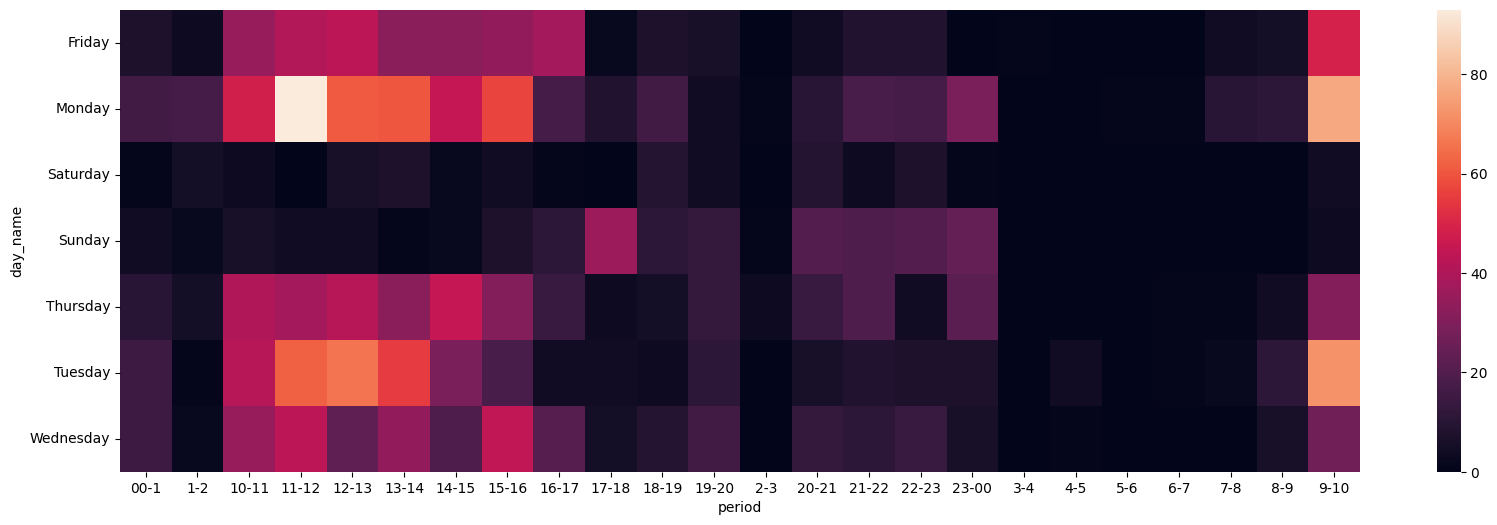

In [58]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()